# Project Description

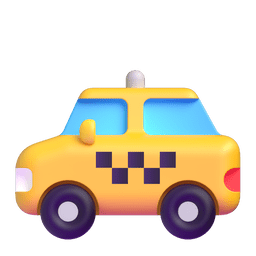

## Perform Exploratory Data Analysis on two datasets containing taxi and trip information
### Dataset #1 = /datasets/project_sql_result_01.csv

Contains the following:
- ***`company_name`***: taxi company name


- ***`trips_amount`***: the number of rides for each taxi company on November 15-16, 2017

### Dataset #2 = /datasets/project_sql_result_04.csv

Contains the following:
- ***`dropoff_location_name`***: Chicago neighborhoods where rides ended


- ***`average_trips`***: the average number of rides that ended in each neighborhood in November 2017


### Tasks

   **1)** import the files


   **2)** study the data they contain


   **3)** make sure the data types are correct


   **4)** identify the top 10 neighborhoods in terms of drop-offs


   **5)** make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs


   **6)** draw conclusions based on each graph and explain the results
   

### Dataset #3 = /datasets/project_sql_result_07.csv

Contains the following:
- ***`start_ts`***: pickup date and time


- ***`weather_conditions`***: weather conditions at the moment the ride started


- ***`duration_seconds`***: ride duration in seconds


### Tasks

   **1)** test the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."


   **2)** decide significance level (alpha)


   **3)** explain formulation of null and alternative hypotheses and the criterion used for testing

In [27]:
# Importing libraries

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st


In [28]:
# Importing data from CSVs

try:
    df1 = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/SQL/moved_project_sql_result_01.csv')
except:
    print('Please check your path for Dataset #1')

try:
    df2 = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/SQL/moved_project_sql_result_04.csv')
except:
    print('Please check your path for Dataset #2')
    
try:
    df3 = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/SQL/moved_project_sql_result_07.csv')
except:
    print('Please check your path for Dataset #3')    


In [29]:
# Looking into the tables to understand what type of processing has to be done

df1.info()
#df1.describe() #additional statistical information
df1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


company_name    object
trips_amount     int64
dtype: object

**`Initial Findings - Trips per Company`**

- company_name column looks to be the right data type (object/string)


- trips_amount also looks to be the right data type (int)

In [30]:
# Looking into the tables to understand what type of processing has to be done

df2.info()
#df2.describe() #additional statistical information
df2.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


dropoff_location_name     object
average_trips            float64
dtype: object

**`Initial Findings - Average Trips per Neighborhood`**

Like the above section:
    
- dropoff_location_name column looks to be the right data type (object/string)

    
- average_trips also looks to be the right data type based on the average value (float)

`EDA - Dataset #1`

In [31]:
# Displaying the first DF

display(df1)

#Introducing a new column, % of Total (non top 10) in case we need to broaden the scope
#df1_new_col = df1
#df1_new_col['percentage_of_total'] = (df1_new_col['trips_amount'] / df1_new_col['trips_amount'].sum() *100) 
#display(df1_new_col)


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [32]:
#Top 10 companies in terms of the amount of trips (based on count)

top_df1 = df1.head(10)
display(top_df1)


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [33]:
#Charts for company_name and trips_amount

bar = px.bar(top_df1, x="trips_amount", y="company_name", color="trips_amount", title='Trips per Company (Top 10) <br><sup>November 15-16, 2017</sup>', 
            labels={"trips_amount": "Number of Trips","company_name": "Company Name"}, width=1100, height=600)
bar.update_coloraxes(colorbar_title_text='Scale', colorbar_tickangle=-0, colorbar_bordercolor='lightgray', colorbar_borderwidth=1)
# bar.update_layout(xaxis={"dtick":1})
bar.show()

funnel = px.funnel(top_df1, x='trips_amount', y='company_name', title='Trips per Company (Top 10) <br><sup>November 15-16, 2017</sup>',
                labels={"trips_amount": "Number of Trips","company_name": "Company Name"}, width=1100, height=600)
funnel.update_traces(marker = {'line': {'width': [3, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                                        'color': ['darkblue','grey','grey','grey','grey','grey','grey','grey','grey','grey']}})
funnel.show()

pie = px.pie(top_df1, values='trips_amount', names='company_name', title='Trips per Company (Top 10) <br><sup>November 15-16, 2017</sup>',
            color_discrete_sequence=px.colors.sequential.RdBu, labels={"trips_amount": "Number of Trips","company_name": "Company Name"}, width=1100, height=600)
pie.show()

box = px.box(top_df1['trips_amount'], color_discrete_sequence = ['darkcyan'], title='Trips per Company (Top 10) <br><sup>Boxplot for November 15-16, 2017</sup>', width=1100, height=600)
box.update_layout(
    xaxis_title=" ",
    yaxis_title=" ")
box.show()

**`Findings - Trips per Company`**


- Based on the first two charts, the popularity of the Flash Cab company is telling. The amounts of trip for this company (during this specific time horizon) is almost double than the next company (Tax Affiliation Services). Flash Cab seems to have a decent stronghold on the market which could due to 1) better/larger scope of marketing/advertising, 2) ease of access (websites, apps instead of the old school 'yellow pages' or 3) cheaper prices

    
- The next 5 companies are similar in trip counts ranging from ~9-10k. About half of the rides taken (under a top 10 lense) are 'taken care of' by 4 companies (darker color shades from the pie chart).
    

- Per the box plot, the dataset (again, top 10 view only) shows a negative skew with one outlier above the 'upper fence'. Given its shorter size, we see that the overall distribution of trips is closer to one another with a decent chunk (slightly above half) in the lower quartile.

    
- Overall, it would be interesting to see entire month data to come to a more complete conclusion (perhaps the story shifts towards another company if we broaden the time horizon). Also interesting would be seeing the pricing per ride (with ride length, etc.) to help us better understand the drivers towards Flash Cab's popularity to start.

`EDA - Dataset #2`

In [34]:
# Displaying the second DF

display(df2)

#Introducing a new column, % of Total (non top 10) in case we need to broaden the scope
#df2_new_col = df2
#df2_new_col['percentage_of_total'] = (df2_new_col['average_trips'] / df2_new_col['average_trips'].sum() *100) 
#display(df2_new_col)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [35]:
#Top 10 neighborhoods in terms of drop-offs (based on averages)

top_df2 = df2.head(10)
display(top_df2)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [36]:
#Charts for dropoff and average_trips (consistent charts and color schemes to previous)

bar = px.bar(top_df2, x="average_trips", y="dropoff_location_name", color="average_trips", title='Average Trips per Dropoff Area <br><sup>November 2017</sup>', 
            labels={"average_trips": "Average Number of Trips","dropoff_location_name": "Neighborhood"}, width=1100, height=600)
bar.update_coloraxes(colorbar_title_text='Scale', colorbar_tickangle=-0, colorbar_bordercolor='lightgray', colorbar_borderwidth=1)
bar.show()

funnel = px.funnel(top_df2, x='average_trips', y='dropoff_location_name', title='Average Trips per Dropoff Area (Top 10) <br><sup>November 2017</sup>',
                labels={"average_trips": "Average Number of Trips","dropoff_location_name": "Neighborhood"}, width=1100, height=600)
funnel.update_traces(marker = {'line': {'width': [3, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
                                        'color': ['darkblue','grey','grey','grey','grey','grey','grey','grey','grey','grey']}})
funnel.show()

pie = px.pie(top_df2, values='average_trips', names='dropoff_location_name', title='Average Trips per Dropoff Area <br><sup>November 2017</sup>',
            color_discrete_sequence=px.colors.sequential.RdBu, labels={"average_trips": "Average Number of Trips","dropoff_location_name": "Neighborhood"}, width=1100, height=600)
pie.show()

box = px.box(top_df2['average_trips'], color_discrete_sequence = ['darkcyan'], title='Average Trips per Dropoff Area <br><sup>Boxplot for November 2017</sup>', width=1100, height=600)
box.update_layout(
    xaxis_title=" ",
    yaxis_title=" ")
box.show()

**`Findings - Average Trips per Neighborhood`**

- Based on the first two charts, the average trip concentration resides in 4 popular neighborhoods: 1) Loop, 2) River North, 3) Streeterville and 4) West Loop. This could be due to the neighborhoods housing: 1) entertainment (restaurants, shopping, museums to name a few) 2) a larger chunk of the population, 3) easier road access (in/out; parking, etc.) and 4) each neighborhood being in close proximity of each other.
    

    
- The next 6 neighborhoods show some similarity in average trip count which ranges from ~1-2.5k. About half of the overall trip concentration is location in two neighborhoods (Loop and River North).
    
    

- Per the box plot, the dataset (again, top 10 view only) shows a positive skew with no outliers. We see that the overall concentration of average trips 'lives' in the 3rd quartile with the top neighborhoods delivering significantly more trips for the month of November.
    

    
- Similar to the other conclusion, it would be interesting to see Nov 15-16 data to come to a more focused conclusion (which would be compared to the previous analysis). Another intereting data point would be pairing the neighborhoods to the companies that have higher trip counts along with the distance (are they shorter? are they longer trips?, do they bring in more money overall or less?).


`Hypothesis Testing - Dataset #3`

In [37]:
# Looking into the table to understand what type of processing has to be done (if at all)

df3.info()
#df3.describe() #additional statistical information
df3.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [38]:
# Displaying the third DF

display(df3)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [39]:
# Grouped view based on weather_conditions, assuming each instance = to one ride

df3_grouped = df3.groupby('weather_conditions')['duration_seconds'].count()
#display(df3_grouped)

df3_bar = px.bar(df3_grouped, title='Trips per Weather Conditions <br><sup>November 2017</sup>', 
            labels={"weather_conditions": "Weather", "value": "Number of Trips"}, width=1100, height=600)

df3_bar.update_layout(showlegend=False)
df3_bar.show()


In [40]:
# Splitting out the start_ts column to Day (to confirm it's a Saturday) and Time (hour)

df3['start_ts']= pd.to_datetime(df3['start_ts'])
#df3['start_day_name'] = df3['start_ts'].dt.day_name() #confirmed it's only Saturday
df3['start_day'] = df3['start_ts'].dt.day
#df3['start_hour'] = df3['start_ts'].dt.hour

display(df3)

# checking total ride duration during the specific Saturdays
print('November 25th:')
df3_nov_25 = df3.query("start_day == 25").groupby('weather_conditions')['duration_seconds'].sum().reset_index()
display(df3_nov_25)
print('November 18th:')
df3_nov_18 = df3.query("start_day == 18").groupby('weather_conditions')['duration_seconds'].sum().reset_index()
display(df3_nov_18)
print('November 11th:')
df3_nov_11 = df3.query("start_day == 11").groupby('weather_conditions')['duration_seconds'].sum().reset_index()
display(df3_nov_11)
print('November 4th:')
df3_nov_4 = df3.query("start_day == 4").groupby('weather_conditions')['duration_seconds'].sum().reset_index()
display(df3_nov_4)


,start_ts,weather_conditions,duration_seconds,start_day
0,2017-11-25 16:00:00,Good,2410.0,25
1,2017-11-25 14:00:00,Good,1920.0,25
2,2017-11-25 12:00:00,Good,1543.0,25
3,2017-11-04 10:00:00,Good,2512.0,4
4,2017-11-11 07:00:00,Good,1440.0,11
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,25
1064,2017-11-11 10:00:00,Good,1318.0,11
1065,2017-11-11 13:00:00,Good,2100.0,11
1066,2017-11-11 08:00:00,Good,1380.0,11


November 25th:


,weather_conditions,duration_seconds
0,Good,178058.0


November 18th:


,weather_conditions,duration_seconds
0,Bad,224260.0
1,Good,177702.0


November 11th:


,weather_conditions,duration_seconds
0,Good,758973.0


November 4th:


,weather_conditions,duration_seconds
0,Bad,212637.0
1,Good,660979.0


In [43]:
# Bar chart to see volume of rides per Saturday in November

df3_sum = df3.groupby(['start_day','weather_conditions'])['duration_seconds'].sum().reset_index()


df_loop = px.bar(df3_sum, x='start_day', y='duration_seconds', color='weather_conditions', barmode='group',
            title='Trips per Saturday <br><sup>November 2017</sup>', 
            labels={"weather_conditions": "Weather", "duration_seconds": "Trip Duration (seconds)", "start_day": "Day of the Month"}, width=1100, height=600)
df_loop.show()

df3_avg = df3.groupby(['start_day','weather_conditions'])['duration_seconds'].mean().reset_index()
#display(df3_avg)

df_loop_avg = px.bar(df3_avg, x='start_day', y='duration_seconds', color='weather_conditions', barmode='group',
            title='Trips per Saturday <br><sup>November 2017</sup>', 
            labels={"weather_conditions": "Weather", "duration_seconds": "Average Trip Duration (seconds)", "start_day": "Day of the Month"}, width=1100, height=600)

df_loop_avg.show()


In [16]:
# Hypothesis testing - Equality
# Using the Equality method in order to compare the average ride duration for customers coming from different weather conditions and their statistical significane to one another
    # H₀ Null: "There is no difference between the Bad and Good weather means (based on ride duration in seconds)"
    # H₁ Alternative: "There's an illustrated difference between the Bad and Good weather means (based on ride duration in seconds)"

df3_bad_weather = df3[df3['weather_conditions'] == 'Bad']['duration_seconds']
df3_good_weather = df3[df3['weather_conditions'] == 'Good']['duration_seconds']
#display(np.var(df3_bad_weather))
#display(np.var(df3_good_weather))

alpha = 0.05

results_eq = st.ttest_ind(df3_bad_weather, df3_good_weather, equal_var=False)

print('p-value:', results_eq.pvalue)

if (results_eq.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 6.738994326108734e-12
We reject the null hypothesis


**`Testing Conclusion - Trips to the O'Hare International Airport`**

- Equality testing shows us that while there are ***statistically significant*** differences in the means between the two datasets of the 'weather_conditions' groupings. From the entire analysis, we can see that the average rides under 'rainy' days are longer in duration.
    

- There is significant evidence for us to reject the null hypothesis that there is no difference in average duration of rides between weather conditions on each Saturday of November 2017.

**`Overall Conclusion`**

- While there are quite a few taxi companies in the Chicago area, the taxi market is largely held by 1 or 2 companies based on the amounts of trips.

    
- Four popular neighborhoods hold a relatively large share of drop-off locations. These neighborhoods are all near or next to each other (downtown Chicago). Could be explained by the volume of activity/population in those areas.

    
    
- Weather conditions **do** have ride impacts for the month of November.  
    
    - Overall, we see ***1)*** a higher volume of trips during good weather conditions paired with ***2)*** longer ride duration and ***3)*** an inverse relationship of average trip duration during bad weather conditions, where we have ***higher*** than average trip duration during rainy weekends which is reinforced by our t-test above (speficially during the first Saturday of November 2017).
    
    - This can possibly make some sense as people don't want to be out on the rain and/or the choose a taxi instead of a shorter train ride/walk due to the weather. ⬅️ ***possibly explained by traffic congestion due to weather conditions as people tend to slow down during 'bad' weather***
    
    - The higher average duration of trips during bad weather conditions only occur during the two rainy days during the month, leaving us with a very small and concentrated sample that may not be beneficial for business insights (unless November is statistically the highest revenue producing month of the year). 
    
    - We could also dig deeper into the actual conditions of these two rainy Saturday's to see the degree differences between the two (is there a telling difference which matches our analysis? (average duration being higher the first Saturday of Nov. vs. the 3rd) or are there further weather conditions at play here? did rain occur specifically during certain hours? if so, what was the precipitation? All data points that come to mind to prepare better business decisions!

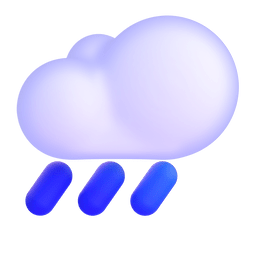